In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
# ds = datasets(zoo.data)
# ds.keys()
# df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
#                      columns= ds['feature_names'] + ['target'])
# df['class'] = pd.Categorical.from_codes(ds.target, ds.target_names)
# df

In [18]:
data =  pd.read_csv('zoo.data')#, sep=",")
df = pd.DataFrame(data)
#df.keys()

Attribute Information:

1. animal name: Unique for each instance
2. hair: Boolean
3. feathers: Boolean
4. eggs: Boolean
5. milk: Boolean
6. airborne: Boolean
7. aquatic: Boolean
8. predator: Boolean
9. toothed: Boolean
10. backbone: Boolean
11. breathes: Boolean
12. venomous: Boolean
13. fins: Boolean
14. legs: Numeric (set of values: {0,2,4,5,6,8})
15. tail: Boolean
16. domestic: Boolean
17. catsize: Boolean
18. type: Numeric (integer values in range [1,7])

In [20]:
df_clean = df.rename(columns={ 1 : 'Hair', 0 : 'Feathers', 0.1 : 'Eggs', 1.1 : 'Milk', 0.2 : 'Airborne',
                    0.3: 'Aquatic', 1.2: 'Predator', 1.3: 'Toothed', 1.4: 'Backbone', 1.5 : 'Breathes', 
                    0.4: 'Venomous', 0.5: 'Fins', 4: 'Legs', 0.6: 'Tail', 0.7: 'Domestic', 1.6: 'Catsize', 1.7:'Type'})

df_clean

,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
X, y = ds.data, ds.target
#accuracy= []
for i in range(1,10):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    plt.figure()
    #tree.plot_tree(clf,filled=True)
    clf = clf.fit(X, y)
    tree.plot_tree(clf) 
    #plt.savefig('tree.eps',format='eps',bbox_inches = "tight") 

In [21]:
header_list = ["animal_name",
               "hair",
               "feathers",
               "eggs",
               "milk",
               "airborne",
               "aquatic",
               "predator",
               "toothed",
               "breathes",
               "backbone",
               "venomous",
               "fins",
               "legs",
               "tail",
               "domestic",
               "catsize",
               "type"
              ]
df = pd.read_csv("zoo.data", names=header_list)


Class -- Set of animals:

1 -- (41) aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf

2 -- (20) chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren

3 -- (5) pitviper, seasnake, slowworm, tortoise, tuatara

4 -- (13) bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna

5 -- (4) frog, frog, newt, toad

6 -- (8) flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp

7 -- (10) clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm

In [35]:
df.head()



,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,breathes,backbone,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [48]:
y = np.array(df['type'])
X = np.array(df.drop(columns=['animal_name', 'type']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Selected criterion is gini, selected max_depth is: 1
The depth of the decision tree is:  1
The accuracy of the model with max depth = 1 is: 0.6666666666666666 

Selected criterion is gini, selected max_depth is: 2
The depth of the decision tree is:  2
The accuracy of the model with max depth = 2 is: 0.7619047619047619 

Selected criterion is gini, selected max_depth is: 3
The depth of the decision tree is:  3
The accuracy of the model with max depth = 3 is: 0.8571428571428571 

Selected criterion is gini, selected max_depth is: 4
The depth of the decision tree is:  4
The accuracy of the model with max depth = 4 is: 0.9047619047619048 

Selected criterion is gini, selected max_depth is: 5
The depth of the decision tree is:  5
The accuracy of the model with max depth = 5 is: 0.9523809523809523 

Selected criterion is gini, selected max_depth is: 6
The depth of the decision tree is:  6
The accuracy of the model with max depth = 6 is: 0.9523809523809523 

Selected criterion is gini, select

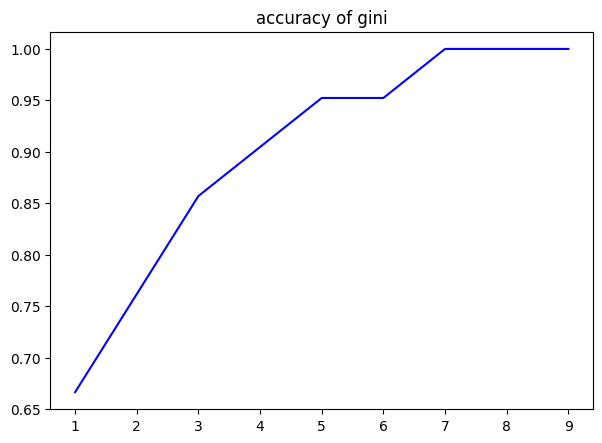

Selected criterion is entropy, selected max_depth is: 1
The depth of the decision tree is:  1
The accuracy of the model with max depth = 1 is: 0.6666666666666666 

Selected criterion is entropy, selected max_depth is: 2
The depth of the decision tree is:  2
The accuracy of the model with max depth = 2 is: 0.7619047619047619 

Selected criterion is entropy, selected max_depth is: 3
The depth of the decision tree is:  3
The accuracy of the model with max depth = 3 is: 0.8571428571428571 

Selected criterion is entropy, selected max_depth is: 4
The depth of the decision tree is:  4
The accuracy of the model with max depth = 4 is: 0.9523809523809523 

Selected criterion is entropy, selected max_depth is: 5
The depth of the decision tree is:  5
The accuracy of the model with max depth = 5 is: 0.9523809523809523 

Selected criterion is entropy, selected max_depth is: 6
The depth of the decision tree is:  6
The accuracy of the model with max depth = 6 is: 1.0 

Selected criterion is entropy, 

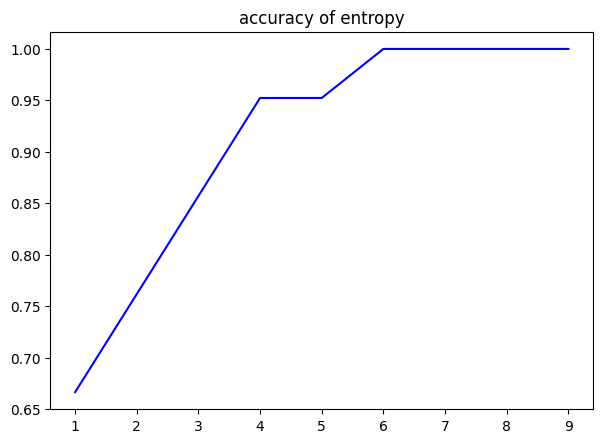

In [59]:
criterion = ['gini', 'entropy']

for i in criterion:
    accuracy = []
    for j in range(1,10):
        clf = DecisionTreeClassifier(random_state=0, criterion=i, max_depth=j)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        depth = clf.get_depth()
        accuracy.append(accuracy_score(y_pred, y_test))
        print(f'Selected criterion is {i}, selected max_depth is: {j}')
        print('The depth of the decision tree is: ', clf.get_depth())
        #print(confusion_matrix(y_test, y_hat))
        print(f'The accuracy of the model with max depth = {depth} is: {accuracy_score(y_pred, y_test)} \n')
    sns.lineplot(range(1, 10), accuracy,color='blue')
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
    plt.title(f'accuracy of {i}')
    plt.show();


# from the graph we can conclude that gini is easy to compute and entrophy is more accurate and efficient.
# entrophy requires less depth to achieve more accuracy.

[Text(394.54545454545456, 350.5357142857143, 'X[3] <= 0.5\nentropy = 2.433\nsamples = 80\nvalue = [31, 15, 5, 12, 3, 6, 8]'),
 Text(345.22727272727275, 296.6071428571429, 'X[7] <= 0.5\nentropy = 2.4\nsamples = 49\nvalue = [0, 15, 5, 12, 3, 6, 8]'),
 Text(246.5909090909091, 242.67857142857142, 'X[1] <= 0.5\nentropy = 1.636\nsamples = 30\nvalue = [0, 15, 1, 0, 0, 6, 8]'),
 Text(197.27272727272728, 188.75, 'X[4] <= 0.5\nentropy = 1.273\nsamples = 15\nvalue = [0, 0, 1, 0, 0, 6, 8]'),
 Text(147.95454545454547, 134.82142857142856, 'X[8] <= 0.5\nentropy = 0.922\nsamples = 10\nvalue = [0, 0, 1, 0, 0, 1, 8]'),
 Text(98.63636363636364, 80.89285714285711, 'X[6] <= 0.5\nentropy = 0.503\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 1, 8]'),
 Text(49.31818181818182, 26.964285714285722, 'entropy = 0.918\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 2]'),
 Text(147.95454545454547, 26.964285714285722, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 0, 6]'),
 Text(197.27272727272728, 80.89285714285711, 'entropy

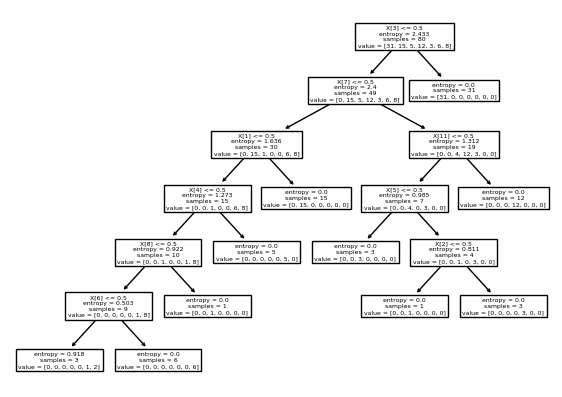

In [72]:
y = np.array(df['type'])
X = np.array(df.drop(columns=['animal_name', 'type']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)  

plt.figure()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)   # i hope you are happy joshuva, Keep smiling :)
# if we plot based on the animal name.. it will be so crowded.. and you could try that one too 

In [66]:
X_tree, y_tree = df.hair, df.eggs # it is not the names
#accuracy= []
clf = tree.DecisionTreeClassifier()#criterion = 'gini'), max_depth = )
#plt.figure()
#tree.plot_tree(clf,filled=True)
clf = clf.fit(X_tree, y_tree)   #  i could not able to understand what you are trying to fit here. 
# because, here we used to fit the dataframes 
# ok.. in iris  
tree.plot_tree(clf)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [65]:
len(df.hair) == len(df.eggs)

True

In [62]:
#df['hair'].shape
X.shape

(101, 16)

In [67]:
X, y = ds.data, ds.target   # here ds.data is 4 columns right?  okok investigate iris. 
# the problem is ds.data is not dataframe..

# ok what is desire? what you want to see.. for example are trying to predict/classify eggs, based upon 
# hair. Like if the animal has hair. it should lay eggs. things like that are you trying to achieve.
# This is what i see from your attempt.
# 
accuracy= []
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
plt.figure()  
#tree.plot_tree(clf,filled=True)
clf = clf.fit(X, y)
tree.plot_tree(clf) 
    #plt.savefig('tree.eps',format='eps',bbox_inches = "tight")   # save 10 images.. 

NameError: name 'ds' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=146f2f95-10e2-4546-b8bb-7deb558f2ad8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>